In [1]:
import pandas as pd
def load_data(datasetCsv='housing.csv'):
    return pd.read_csv('datasets/'+datasetCsv)

In [3]:
light_data = load_data(datasetCsv='lightdata')

In [36]:
list(light_data)

['Date', ' Time', ' Ambient', ' PixAvg', ' Desired']

In [41]:
simple_data = light_data.drop('Date', axis=1).drop(' Time', axis=1)
simple_data

,Ambient,PixAvg,Desired
0,82.25,25.981308,73.34130
1,84.00,10.841121,74.14080
2,87.50,44.859813,88.70980
3,91.00,5.981308,76.68910
4,68.25,38.878505,93.81810
5,66.50,3.925234,88.60060
6,68.25,10.841121,80.61970
7,78.75,18.878505,80.74970
8,77.00,18.878505,79.22090
9,77.00,60.000000,54.20100


In [125]:
train_ok = simple_data[ simple_data[' Ambient'] > 0.1 ]
train_ok.describe()

,Ambient,PixAvg,Desired
count,81.000000,81.000000,81.000000
mean,159.487654,37.443175,68.613670
std,558.552243,24.993873,27.197955
min,1.750000,2.990654,12.677100
25%,56.000000,18.878505,53.286000
50%,78.750000,30.841121,79.220900
75%,105.000000,58.691589,90.482800
max,5020.750000,100.000000,96.054600


In [127]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_ok, test_size=0.2, random_state=23)
train_x = train_set[[' Ambient', ' PixAvg']]
train_y = train_set[[' Desired']]
test_x = test_set[[' Ambient', ' PixAvg']]
test_y = test_set[[' Desired']]

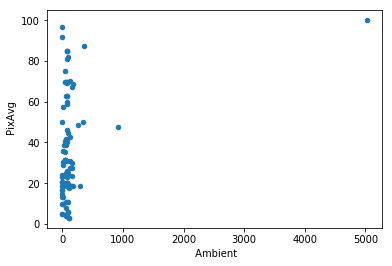

In [128]:
simple_data.plot(kind='scatter', x=' Ambient', y=' PixAvg')

In [129]:
simple_data.corr()

,Ambient,PixAvg,Desired
Ambient,1.000000,0.279723,-0.044193
PixAvg,0.279723,1.000000,-0.426410
Desired,-0.044193,-0.426410,1.000000


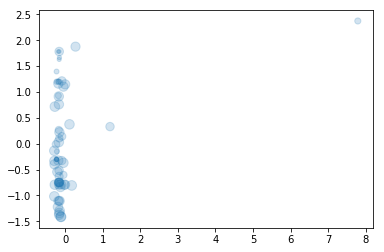

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
plt.scatter(train_x_scaled[:,0], train_x_scaled[:,1], train_y, alpha=0.2)

In [140]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_x_scaled, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
from sklearn.model_selection import cross_val_score
import numpy as np

# compute the utility function score for 10 cross-validation
# cross_val_score(learning_model, X_data, y_labels, scoring='method', cv=num)
lin_tree_scores = cross_val_score(lin_reg, train_x_scaled, train_y,
                        scoring='neg_mean_squared_error', cv=5)

lin_rmse_scores = np.sqrt(-lin_tree_scores)
(lin_rmse_scores)

array([42.30475105, 21.44745172, 31.06699648, 24.51162382, 23.13748068])

In [142]:
from sklearn.tree import DecisionTreeRegressor
forest_reg = DecisionTreeRegressor()
lin_forest_score = cross_val_score(forest_reg, train_x_scaled, train_y,
                            scoring='neg_mean_squared_error', cv=5)
lin_forest_rmse_scores = np.sqrt(-lin_forest_score)
np.mean(lin_forest_rmse_scores)

22.615536060751158

In [153]:
forest_reg.fit(train_x_scaled, train_y)
myval = scaler.transform(np.c_[15,13])
forest_reg.predict(myval)

/home/debdeep/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([91.2294])